In [11]:
from sympy import init_session
init_session()
from IPython.display import display

IPython console for SymPy 0.7.6 (Python 2.7.8-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


In this document we will use the method of Lagrange multipliers to find the absolute maximum and minimum values of a function $f(x,y,z)$ subject to constraints (restrictions) on the allowed values of $x, y$ and $z$. These constraints are given in the form of equations $g(x,y,z) = k_1$ and $h(x,y,z) = k_2$ (where $k_1$ and $k_2$ are constants) relating the variables.

Our example problem is the following:

"The plane $x + y + 2z = 18$ intersects the paraboloid $z = x^2 + y^2$ in an ellipse. Find the points on this ellipse that are nearest to and farthest from the origin."

Here we are asked to find the points $(x,y,z)$ that satisfy both the equation for the plane and the equation of the paraboloid (the constraints) which maximize and minimize the distance of those points from the origin. It turns out that these points are exactly the same points which maximize and minimize the square of the distance of those points from the origin and this function (the square of the distance function) will be easier to work with as it will eliminate the use of square roots in the calculations.

The distance squared of a point $(x,y,z)$ to the origin is given by the function $f(x,y,z) = x^2 + y^2 + z^2$. Hence the mathematical statement of our problem is:

Find the points $(x,y,z)$ which maximize and minimize the function $f(x,y,z) = x^2 + y^2 + z^2$ subject to:

$x + y + 2z = 18$  
$x^2 + y^2 - z = 0$

Let our functions $g$ and $h$ be $x + y + 2z$ and $x^2 + y^2 - z$, respectivly.

The method of Lagrange tells us that the local extreme values of $f$ occur at the points $(x,y,z)$ at which the gradient of f is in the plane spanned by the gradients of $g$ and $h$ or, in mathematical notation,

$\nabla f = \lambda\nabla g + \mu\nabla h,\quad$ where $\lambda$ and $\mu$ are constants (the Lagrange multipliers).

Equating components on both sides of this vector equation and including the constraints give the following five equations in the variables $x, y, z, \lambda$ and $\mu$:

1. $2x = 2\lambda x + \mu$
2. $2y = 2\lambda y + \mu$
3. $2z = -\lambda + 2\mu$
4. $x + y + 2z = 18$
5. $x^2 + y^2 - z = 0$

Using sympy we start by defining the function $f$ (the square distance function)

In [2]:
f = x**2 + y**2 + z**2

Next we tell sympy to treat the letters x, y, z, l and m as symbols (variables); I'm using l and m in place of $\lambda$ and $\mu$ within the calculations.

In [3]:
x, y, z, l, m = symbols('x y z l m')

We now have sympy solve the system of the five equations above. Note that sympy expects you to get each equation in the form "expression = 0" and to pass it the list of the expressions. After the list we indicate the variables to be solved for. Here I am storing the returned solutions in the "solns" variable.

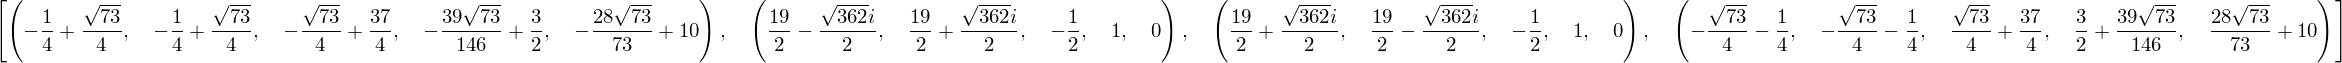

In [5]:
solns=solve([2*x - 2*l*x - m, 2*y - 2*l*y - m, 2*z + l - 2*m, x**2 + y**2 - z, x + y + 2*z - 18], x, y, z, l, m)
display(solns)

Since we only care about real valued $x, y$ and $z$ coordinates, let's extract only those solutions with real $x, y$ and $z$ values. Noticing that all the coordinates are real when the $x$ coordinate is real, we can use a list comprehension to extract the $(x, y, z)$ tuples for only real $x, y$ and $z$ as follows:

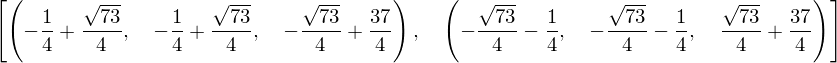

In [6]:
real_solns=[(solns[n][0],solns[n][1],solns[n][2]) for n in range(len(solns)) if solns[n][0].is_real]
display(real_solns)

We have a pair of $(x, y, z)$ values. At one of these points $f(x,y,z) = x^2 + y^2 + z^2$ will be a maximum and at the other $f$ will be a minimum. Let's set up a small loop to evaluate $f$ at each point, giving both the exact value and a decimal approximation for each.

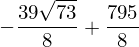

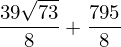

In [8]:
for soln in real_solns:
    display(simplify(f.subs(zip((x,y,z),soln))))
    display(simplify(f.subs(zip((x,y,z),soln))).n())
    print

Remember that $f(x,y,z)$ measures the square of the distance from the origin to $(x,y,z)$, so the actual minimum and maximum distances are the square roots of the smaller and larger numbers, respectivly, shown above. Hence, the approximate minimum and maximum distances from the origin to the ellipse of intersection of the plane and paraboloid are (respectivly):

In [9]:
print sqrt(57.723), sqrt(141.027)

7.59756539952109 11.8754789377103
